# Projeto Previsao Preco Veículos

## Definindo o Problema de Negócop

Nosso objetivo é construir um modelo de ML que seja capaz de fazer previsões dobre o valor de venda de veículos, avaliando o melhor score apresentado.

A varíavel a ser prevista é um valor numérico que representa o valor para venda ou compra de um veículo

**Fonte dos Dados**: - kaggle - https://www.kaggle.com/datasets/athirags/car-data

**Informações Sobre as Variáveis:**

Car_Name: Nome do carro <br>
Year: Ano que o carro foi vendido <br>
Present_price: Preço atual decidido <br>
Mks_Driven:  Total de Km rodados <br>
Fuel_Type: Tipo de Combustível (Diesel ou Gasolina) <br>
Seller Type: Tipo de VEnda <br>
Transmission: Tipo de Cambio (Manual ou Automático) <br>
Owner: Dono <br>
Selling_Price: O preço pelo qual o carro foi comprado (será nossa variável TARGET) <br>

### Bibliotecas

In [41]:
# Carregar e trabalhar dados
import pandas as pd
import datetime

# Geração de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Separar o modelo em treino e teste
from sklearn.model_selection import train_test_split

# Geração de algoritmos para o modelo preditivo
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Avaliação de métricas dos modelos
from sklearn import metrics

# Normalização dos dados
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Deploy do modelo
import joblib

# Arquivo auxiliar com configurações básicas do projeto
from config import data

In [2]:
# Configuração básica do pandas para exibir todos os dados e colunas

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Análise Exploratória

In [3]:
df = pd.read_csv(data/'cardata.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Tamanho dos dados
df.shape

(301, 9)

In [5]:
# Visualizando medidas estatísticas

df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# Validando os tipos de dados e informações básicas

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    str    
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    str    
 6   Seller_Type    301 non-null    str    
 7   Transmission   301 non-null    str    
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), str(4)
memory usage: 21.3 KB


In [7]:
# Validando quantidade de nulos

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# Verificando quantdade de valores únicos

df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [9]:
# Agrupando para verificar quants observações temos por Fuel_type

df.groupby(['Fuel_Type']).size()

Fuel_Type
CNG         2
Diesel     60
Petrol    239
dtype: int64

In [10]:
# Agrupando para verificar quants observações temos por Seller_Type

df.groupby(['Seller_Type']).size()

Seller_Type
Dealer        195
Individual    106
dtype: int64

In [11]:
# Agrupando para verificar quants observações temos por Transmission

df.groupby(['Transmission']).size()

Transmission
Automatic     40
Manual       261
dtype: int64

In [12]:
# Agrupando para verificar quants observações temos por Owner

df.groupby(['Owner']).size()

Owner
0    290
1     10
3      1
dtype: int64

In [13]:
# Agrupando para verificar quants observações temos por Selling_Price

df.groupby(['Selling_Price']).size()

Selling_Price
0.10     1
0.12     1
0.15     1
0.16     1
0.17     1
0.18     1
0.20     6
0.25     5
0.27     1
0.30     3
0.31     1
0.35     4
0.38     2
0.40     5
0.42     2
0.45     8
0.48     4
0.50     5
0.51     1
0.52     1
0.55     2
0.60     8
0.65     4
0.72     1
0.75     4
0.78     1
0.80     1
0.90     2
0.95     1
1.00     1
1.05     5
1.10     3
1.11     1
1.15     4
1.20     3
1.25     2
1.35     3
1.45     1
1.50     1
1.65     1
1.70     1
1.75     1
1.95     2
2.00     1
2.10     1
2.25     3
2.35     1
2.50     2
2.55     2
2.65     3
2.70     1
2.75     2
2.85     3
2.90     3
2.95     2
3.00     4
3.10     4
3.15     1
3.25     3
3.35     2
3.45     1
3.49     1
3.50     2
3.51     1
3.60     1
3.65     1
3.75     2
3.80     1
3.90     2
3.95     2
4.00     5
4.10     2
4.15     1
4.35     1
4.40     3
4.50     7
4.60     1
4.65     1
4.75     6
4.80     2
4.85     1
4.90     2
4.95     2
5.00     1
5.11     1
5.15     1
5.20     1
5.25     7
5.30     2
5.35   

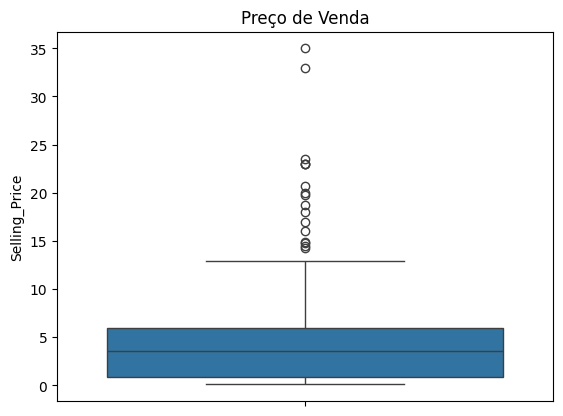

In [14]:
# Possíveis outliers em selling_price

sns.boxplot(df['Selling_Price'])
plt.title('Preço de Venda')
plt.show()

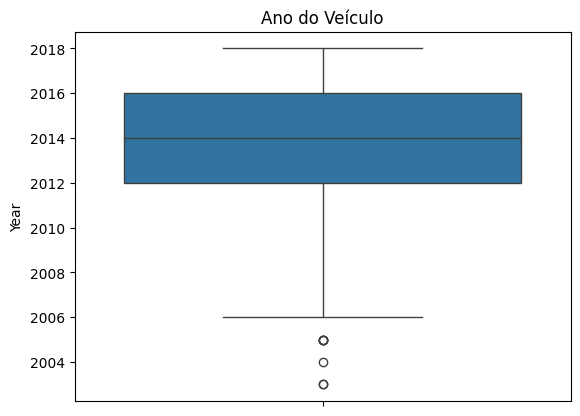

In [15]:
# Possíveis outliers para ano

sns.boxplot(df['Year'])
plt.title('Ano do Veículo')
plt.show()

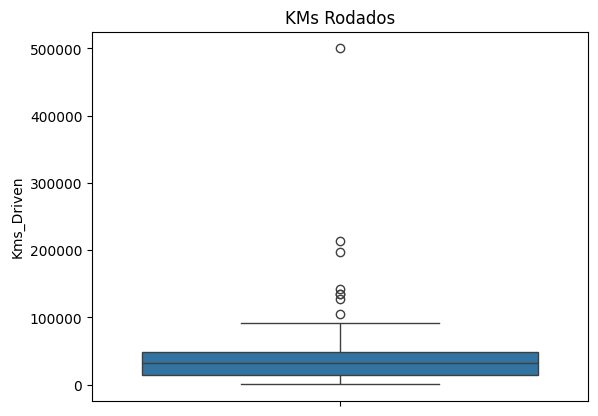

In [16]:
# Analisar outliers de kms rodados

sns.boxplot(df['Kms_Driven'])
plt.title('KMs Rodados')
plt.show()

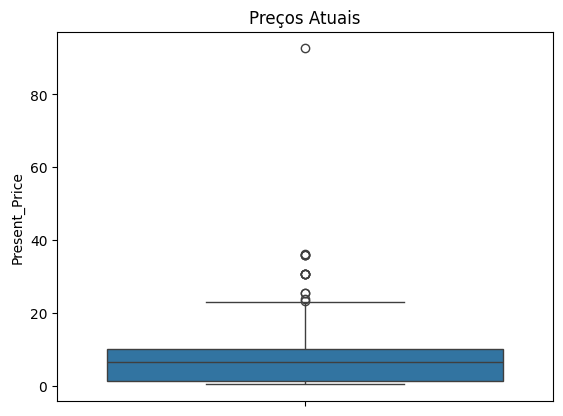

In [17]:
# Analisar outliers de preços atuais

sns.boxplot(df['Present_Price'])
plt.title('Preços Atuais')
plt.show()

### Pré-Processamento dos Dados

Para o pré=processamento vamos fazer as seguintes alterações:
- Criar coluna idade
- Conforme analise de outliers, vamos remover os selling_prices >= 33
- Vamos transformar variáveis str em números (Fuel_Type, Seller_Type, Transmission)
- Excluir as variáveis do tipo str que não serão utilizadas na predição

In [18]:
# Obtendo a idade do veículo

## Pegando o ano atual

ano = datetime.datetime.now().year

In [19]:
# Idade do veículo

df['Age'] = ano - df['Year']

In [20]:
#como identificado no boxplot, vamos remover os outliers de selling price >= 33

df = df[~(df['Selling_Price'] >= 33)]

In [21]:
# Aplicando enconding na coluna fuel_type

df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})

In [22]:
# Aplicando enconding na coluna seller_type

df['Seller_Type'] = df['Seller_Type'].map({'Dealer':0, 'Individual':1})

In [23]:
# Aplicando enconding na coluna Transmission

df['Transmission'] = df['Transmission'].map({'Manual':0, 'Automatic':1})

In [24]:
# Excluindo as variáveis que não serão utilizadas

x = df.drop(['Car_Name', 'Selling_Price'], axis=1) # Variável preditora
y = df['Selling_Price'] # Variável Target

In [25]:
# Visualizado as variáveis preditoras

x.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,5.59,27000,0,0,0,0,12
1,2013,9.54,43000,1,0,0,0,13
2,2017,9.85,6900,0,0,0,0,9
3,2011,4.15,5200,0,0,0,0,15
4,2014,6.87,42450,1,0,0,0,12


In [26]:
# Visualizando a variável target

y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### Separando os dados em treino e teste

Separar os dados em treino e teste:
- Função: train_test_split do pacote Sklearn
- Parametro: test_size --> quantidade de dados que iremos separar para teste, consequentemente o restante fica para treino
- Parametro> random_state --> opcional, porém estou utilizando para reprodudizer os mesmos resultados na sua máquina 

Após a aplicação desse comando teremos os seguintes dados:

- X_Treino: Variáveis preditoras para treino com 75% do conjunto de dados
- X_Teste: Variáveis preditoras para teste com 25% do conjunto de dados
- Y_Treino: Variável alvo com 75% do conjunto de dados
- Y_Teste: Variável alvo com 25% do conjunto de dados

In [27]:
# Separando em treino  teste

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=42)

In [28]:
# Validando quantidade de dados

print('Quantidade de observações de variáveis preditoras de treino: ', x_treino.shape[0])
print('Quantidade de observações de variáveis preditoras de teste: ', x_teste.shape[0])
print('Quantidade de observações de variável alvo de treino: ', y_treino.shape[0])
print('Quantidade de observações de variável alvo de teste: ', y_teste.shape[0])

Quantidade de observações de variáveis preditoras de treino:  224
Quantidade de observações de variáveis preditoras de teste:  75
Quantidade de observações de variável alvo de treino:  224
Quantidade de observações de variável alvo de teste:  75


### Escolhendo o algoritmo de criação e treino do modelo

Vamos usar 4 algoritmos para avaliarmos qual o melhor para o modelo

In [29]:
# Algoritmo sklearn linear regression
# Criando algoritmo
lr = LinearRegression()

# Treinando algoritmo
lr.fit(x_treino, y_treino)

# Algortimo sklearn random forest linear regression
# Criando algoritmo
rf = RandomForestRegressor()

# Treinando algoritmo
rf.fit(x_treino, y_treino)

# Algortimo sklearn gradient boost linear regression
# Criando algoritmo
xgb = GradientBoostingRegressor()

# Treinando algoritmo
xgb.fit(x_treino, y_treino)

# Algortimo xgboost linear regression
# Criando algoritmo
xg = XGBRegressor()
# Treinando algoritmo
xg.fit(x_treino, y_treino)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [30]:
# Fazendo as previsões

# Previsao sklearn linear regression
previsao_lr = lr.predict(x_teste)

# Previsao sklearn random forest linear regression
previsao_rf = rf.predict(x_teste)

# Previsao sklearn gradient boost linear regression
previsao_xgb = xgb.predict(x_teste)

# Previsao xgboost linear regression
previsao_xg = xg.predict(x_teste)

### Avaliando a Performance dos Algoritmos

In [31]:
# Avalisando a performance através do r2 score

# score sklearn linear regression
score_lr = metrics.r2_score(y_teste, previsao_lr)

# score sklearn random forest linear regression
score_rf = metrics.r2_score(y_teste, previsao_rf)

# score sklearn gradient boost linear regression
score_xgb = metrics.r2_score(y_teste, previsao_xgb)

# score xgboost linear regression
score_xg = metrics.r2_score(y_teste, previsao_xg)

In [32]:
# Resultado do score

print('Score utilizando Linear Regression:', score_lr)
print('Score utilizando Linear Random Forest Regression:', score_rf)
print('Score utilizando GradientBoostRegression:', score_xgb)
print('Score utilizando XGBRegressor:', score_xg)

Score utilizando Linear Regression: 0.7106971141592351
Score utilizando Linear Random Forest Regression: 0.7670684159781205
Score utilizando GradientBoostRegression: 0.9089773659260217
Score utilizando XGBRegressor: 0.9007058505253708


### Retreinando e Reavaliando agora com os dados normalizados

In [37]:
# Aplicando a normalização dos dados

sc = MinMaxScaler()
x_treino_normalizado = sc.fit_transform(x_treino)
x_teste_normalizado = sc.fit_transform(x_teste)

In [35]:
# Algoritmo sklearn linear regression
# Criando algoritmo
lr = LinearRegression()

# Treinando algoritmo
lr.fit(x_treino_normalizado, y_treino)

# Algortimo sklearn random forest linear regression
# Criando algoritmo
rf = RandomForestRegressor()

# Treinando algoritmo
rf.fit(x_treino_normalizado, y_treino)

# Algortimo sklearn gradient boost linear regression
# Criando algoritmo
xgb = GradientBoostingRegressor()

# Treinando algoritmo
xgb.fit(x_treino_normalizado, y_treino)

# Algortimo xgboost linear regression
# Criando algoritmo
xg = XGBRegressor()
# Treinando algoritmo
xg.fit(x_treino_normalizado, y_treino)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [38]:
# Fazendo as previsões

# Previsao sklearn linear regression
previsao_lr = lr.predict(x_teste_normalizado)

# Previsao sklearn random forest linear regression
previsao_rf = rf.predict(x_teste_normalizado)

# Previsao sklearn gradient boost linear regression
previsao_xgb = xgb.predict(x_teste_normalizado)

# Previsao xgboost linear regression
previsao_xg = xg.predict(x_teste_normalizado)

In [39]:
# Avalisando a performance através do r2 score

# score sklearn linear regression
score_lr = metrics.r2_score(y_teste, previsao_lr)

# score sklearn random forest linear regression
score_rf = metrics.r2_score(y_teste, previsao_rf)

# score sklearn gradient boost linear regression
score_xgb = metrics.r2_score(y_teste, previsao_xgb)

# score xgboost linear regression
score_xg = metrics.r2_score(y_teste, previsao_xg)

In [40]:
# Resultado do score

print('Score utilizando Linear Regression:', score_lr)
print('Score utilizando Linear Random Forest Regression:', score_rf)
print('Score utilizando GradientBoostRegression:', score_xgb)
print('Score utilizando XGBRegressor:', score_xg)

Score utilizando Linear Regression: 0.732553952734333
Score utilizando Linear Random Forest Regression: 0.7224218279845165
Score utilizando GradientBoostRegression: 0.898173328264754
Score utilizando XGBRegressor: 0.8338899132003886


### Retreinando e Reavaliando agora com os dados Padronizados

In [42]:
# Aplicando a normalização dos dados

sc = StandardScaler()
x_treino_padronizado = sc.fit_transform(x_treino)
x_teste_padronizado = sc.fit_transform(x_teste)

In [43]:
# Algoritmo sklearn linear regression
# Criando algoritmo
lr = LinearRegression()

# Treinando algoritmo
lr.fit(x_treino_padronizado, y_treino)

# Algortimo sklearn random forest linear regression
# Criando algoritmo
rf = RandomForestRegressor()

# Treinando algoritmo
rf.fit(x_treino_padronizado, y_treino)

# Algortimo sklearn gradient boost linear regression
# Criando algoritmo
xgb = GradientBoostingRegressor()

# Treinando algoritmo
xgb.fit(x_treino_padronizado, y_treino)

# Algortimo xgboost linear regression
# Criando algoritmo
xg = XGBRegressor()
# Treinando algoritmo
xg.fit(x_treino_padronizado, y_treino)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [44]:
# Fazendo as previsões

# Previsao sklearn linear regression
previsao_lr = lr.predict(x_teste_padronizado)

# Previsao sklearn random forest linear regression
previsao_rf = rf.predict(x_teste_padronizado)

# Previsao sklearn gradient boost linear regression
previsao_xgb = xgb.predict(x_teste_padronizado)

# Previsao xgboost linear regression
previsao_xg = xg.predict(x_teste_padronizado)

In [45]:
# Avalisando a performance através do r2 score

# score sklearn linear regression
score_lr = metrics.r2_score(y_teste, previsao_lr)

# score sklearn random forest linear regression
score_rf = metrics.r2_score(y_teste, previsao_rf)

# score sklearn gradient boost linear regression
score_xgb = metrics.r2_score(y_teste, previsao_xgb)

# score xgboost linear regression
score_xg = metrics.r2_score(y_teste, previsao_xg)

In [46]:
# Resultado do score

print('Score utilizando Linear Regression:', score_lr)
print('Score utilizando Linear Random Forest Regression:', score_rf)
print('Score utilizando GradientBoostRegression:', score_xgb)
print('Score utilizando XGBRegressor:', score_xg)

Score utilizando Linear Regression: 0.7953869510067549
Score utilizando Linear Random Forest Regression: 0.8112437969072473
Score utilizando GradientBoostRegression: 0.8889749057281203
Score utilizando XGBRegressor: 0.8865678179115637


### Salvando modelo para implantação

Após análise dos modelos, decidimos utilizar o modelo GradientBoostRegression para previsão. Agora será salvo o arquivo para utilizar em implantação

In [47]:
joblib.dump(xgb, data/'modelo_treinado_veiculos.pk')

['C:\\Users\\leo-s\\Desktop\\Estudos\\Projeto_Previsao_Valor_Carros\\Data\\modelo_treinado_veiculos.pk']